# Breast Histopathology Images

In [1]:
import os
import zipfile
import random
import shutil
import glob
import numpy as np
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from PIL import Image

## Pre-procesamiento

In [2]:
breast_imgs = glob.glob('breast-histopathology-images/IDC_regular_ps50_idx5/**/**.png', recursive = True)

In [3]:
for imgname in breast_imgs[:5]:
    print(imgname)    

breast-histopathology-images/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1001_class0.png
breast-histopathology-images/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1051_class0.png
breast-histopathology-images/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1101_class0.png
breast-histopathology-images/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1151_class0.png
breast-histopathology-images/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1201_class0.png


Si dejamos "shutil.copy" crearemos un duplicado de las imágenes en las carpetas especificadas, lo cual no es recomendable correr si ya lo hicimos una vez

In [4]:
non_cancer_imgs = []
cancer_imgs = []

for img in breast_imgs:
    if img[-5] == '0':
        non_cancer_imgs.append(img)
    elif img[-5] == '1':
        cancer_imgs.append(img)

# Seleccionar una muestra equilibrada de imágenes sin cáncer
random.seed(1)
non_cancer_sample = random.sample(non_cancer_imgs, min(len(non_cancer_imgs), 88786))

non_cancer_num = len(non_cancer_sample)
cancer_num = len(cancer_imgs) 
total_img_num = non_cancer_num + cancer_num

# Mostrar 
print('Número de imágenes sin cáncer: {}'.format(non_cancer_num))
print('Número de imágenes con cáncer: {}'.format(cancer_num))
print('Total de imágenes: {}'.format(total_img_num))



Número de imágenes sin cáncer: 88786
Número de imágenes con cáncer: 78786
Total de imágenes: 167572


In [35]:
carpeta_nocancer = 'no-cancer/'

for img in non_cancer_sample:
    shutil.copy(img, carpeta_nocancer)


In [7]:
carpeta_cancer = 'cancer/'

for img in cancer_imgs:
    shutil.copy(img, carpeta_cancer)


In [5]:
imagenes_carpeta_cancer = glob.glob('cancer/**.png', recursive = True)
imagenes_carpeta_nocancer = glob.glob('no-cancer/**.png', recursive = True)

print('Imágenes de carpeta cancer: {}' .format(len(imagenes_carpeta_cancer)))
print('Imágenes de carpeta no-cancer: {}' .format(len(imagenes_carpeta_nocancer)))

Imágenes de carpeta cancer: 88786
Imágenes de carpeta no-cancer: 88786


In [19]:
random.seed(1)
cancer_sample = random.sample(cancer_imgs, 11214)
# Configuración del generador de datos
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
# Generar imágenes aumentadas y guardarlas en el directorio de salida
for img_path in cancer_sample:
    img = Image.open(img_path)  
    img = img.resize((50, 50))  
    img_array = np.array(img)
    img_array = img_array.reshape((1,) + img_array.shape)

    i = 0
    for batch in datagen.flow(img_array, batch_size=1, 
                              save_to_dir=carpeta_cancer, 
                              save_prefix='mod',
                              save_format='png'):
        i += 1
        if i >= 5:  
            break

print(f"Imágenes aumentadas guardadas en {carpeta_cancer}")

imagenes_carpeta_cancer = glob.glob('cancer/**.png', recursive = True)
print('Imágenes de carpeta cancer: {}' .format(len(imagenes_carpeta_cancer)))

Imágenes aumentadas guardadas en cancer/


In [6]:
imagenes_carpeta_cancer = glob.glob('cancer/**.png', recursive = True)

print('Imágenes de carpeta cancer: {}' .format(len(imagenes_carpeta_cancer)))


Imágenes de carpeta cancer: 88786


In [7]:

non_cancer_num = len(non_cancer_imgs)  # No cancer
cancer_num = len(cancer_imgs)   # Cancer 
        
total_img_num = non_cancer_num + cancer_num
        
print('Número de imágenes sin cancer: {}' .format(non_cancer_num))   # images of Non cancer
print('Número de imágenes cancer : {}' .format(cancer_num))   # images of cancer 
print('Total de imágenes : {}' .format(total_img_num))

Número de imágenes sin cancer: 198738
Número de imágenes cancer : 78786
Total de imágenes : 277524


In [6]:
carpeta_nocancer = 'no-cancer/'
carpeta_cancer = 'cancer/'
entrenamiento_cancer = 'entrenamiento/cancer/'
entrenamiento_nocancer = 'entrenamiento/nocancer/'
test_cancer = 'test/cancer/'
test_nocancer = 'test/nocancer/'

In [42]:

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[:testing_length]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)

Separamos los datos (imágenes) para entrenamiento y para test. Solo hacerlo una vez

In [43]:
split_size = .8
random.seed(1)
split_data(carpeta_cancer, entrenamiento_cancer, test_cancer, split_size)
split_data(carpeta_nocancer, entrenamiento_nocancer, test_nocancer, split_size)

In [44]:
entrenamiento_cancer = 'entrenamiento/cancer/'
entrenamiento_nocancer = 'entrenamiento/nocancer/'
test_cancer = 'test/cancer/'
test_nocancer = 'test/nocancer/'

datos_entrenamiento_cancer = glob.glob('entrenamiento/cancer/**.png', recursive = True)
datos_entrenamiento_nocancer = glob.glob('entrenamiento/nocancer/**.png', recursive = True)
datos_test_cancer = glob.glob('test/cancer/**.png', recursive = True)
datos_test_nocancer = glob.glob('test/nocancer/**.png', recursive = True)


print('Imágenes de entrenamiento sin cancer: {}' .format(len(datos_entrenamiento_cancer)))
print('Imágenes de entrenamiento con cancer: {}' .format(len(datos_entrenamiento_nocancer)))
print('Imágenes de entrenamiento total: {}' .format(len(datos_entrenamiento_nocancer)+len(datos_entrenamiento_cancer)))
print('Imágenes de test sin cancer: {}' .format(len(datos_test_cancer)))
print('Imágenes de test con cancer: {}' .format(len(datos_test_nocancer)))
print('Imágenes de test total: {}' .format(len(datos_test_nocancer)+len(datos_test_cancer)))

Imágenes de entrenamiento sin cancer: 71028
Imágenes de entrenamiento con cancer: 71028
Imágenes de entrenamiento total: 142056
Imágenes de test sin cancer: 17758
Imágenes de test con cancer: 17758
Imágenes de test total: 35516


## RNC
Las imágenes proporcionadas en https://www.kaggle.com/datasets/paultimothymooney/breast-histopathology-images/data tienen una dimensión de 50x50 y están a color (RGB). 

In [7]:
TRAINING_DIR = "entrenamiento/"
 
train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=100,
                                                    class_mode='binary',
                                                    target_size=(50, 50))

VALIDATION_DIR = "test/"

validation_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=100,
                                                              class_mode='binary',
                                                              target_size=(50, 50))

Found 142056 images belonging to 2 classes.
Found 35516 images belonging to 2 classes.


In [10]:
total_muestras = len(train_generator)  
tamano_lote = train_generator.batch_size
numero_de_lotes = total_muestras // tamano_lote
print(total_muestras)
print(tamano_lote)
print(numero_de_lotes)

1421
100
14


### Modelo 1

In [8]:
checkpoint = ModelCheckpoint('Pesos/Modelo1/pesos_del_modelo_epoch_{epoch:02d}.h5', 
                             save_weights_only=True, 
                             save_best_only=False)

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(50, 50, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(train_generator,
                              steps_per_epoch= 1000,
                              epochs=100,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks=checkpoint)

Epoch 1/100
1000/1000 [==============================] - 187s 186ms/step - loss: 0.5382 - accuracy: 0.7354 - val_loss: 0.4466 - val_accuracy: 0.8011
Epoch 2/100
1000/1000 [==============================] - 154s 154ms/step - loss: 0.4620 - accuracy: 0.7896 - val_loss: 0.4744 - val_accuracy: 0.7764
Epoch 3/100
1000/1000 [==============================] - 147s 147ms/step - loss: 0.4368 - accuracy: 0.8037 - val_loss: 0.4085 - val_accuracy: 0.8217
Epoch 4/100
1000/1000 [==============================] - 143s 143ms/step - loss: 0.4173 - accuracy: 0.8164 - val_loss: 0.4336 - val_accuracy: 0.8041
Epoch 5/100
1000/1000 [==============================] - 143s 143ms/step - loss: 0.4018 - accuracy: 0.8239 - val_loss: 0.3834 - val_accuracy: 0.8332
Epoch 6/100
1000/1000 [==============================] - 142s 142ms/step - loss: 0.3918 - accuracy: 0.8303 - val_loss: 0.3739 - val_accuracy: 0.8395
Epoch 7/100
1000/1000 [==============================] - 145s 145ms/step - loss: 0.3814 - accuracy: 0.8355

Epoch 56/100
1000/1000 [==============================] - 150s 150ms/step - loss: 0.3372 - accuracy: 0.8583 - val_loss: 0.3335 - val_accuracy: 0.8583
Epoch 57/100
1000/1000 [==============================] - 146s 146ms/step - loss: 0.3347 - accuracy: 0.8597 - val_loss: 0.3390 - val_accuracy: 0.8565
Epoch 58/100
1000/1000 [==============================] - 144s 144ms/step - loss: 0.3386 - accuracy: 0.8579 - val_loss: 0.3341 - val_accuracy: 0.8581
Epoch 59/100
1000/1000 [==============================] - 144s 144ms/step - loss: 0.3388 - accuracy: 0.8573 - val_loss: 0.3380 - val_accuracy: 0.8593
Epoch 60/100
1000/1000 [==============================] - 144s 144ms/step - loss: 0.3376 - accuracy: 0.8584 - val_loss: 0.3559 - val_accuracy: 0.8529
Epoch 61/100
1000/1000 [==============================] - 144s 144ms/step - loss: 0.3395 - accuracy: 0.8581 - val_loss: 0.3685 - val_accuracy: 0.8497
Epoch 62/100
1000/1000 [==============================] - 143s 143ms/step - loss: 0.3414 - accuracy:

In [12]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs


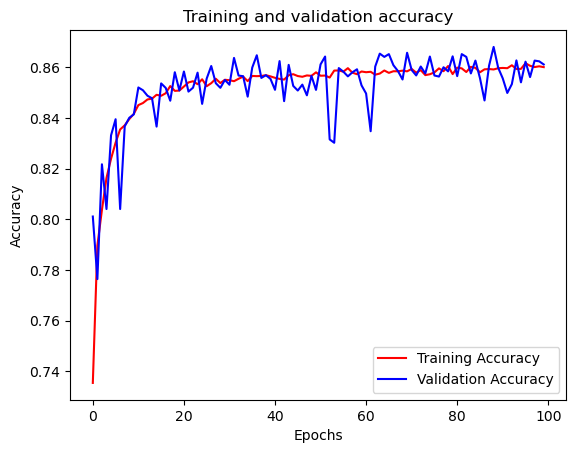

In [13]:
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy') 
plt.legend()  

plt.show()

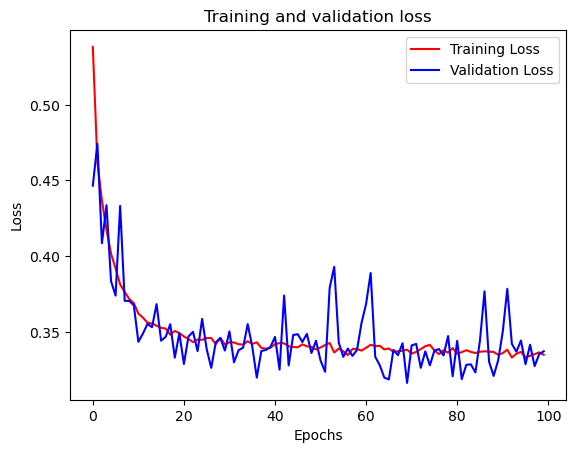

In [14]:
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label = "Training Loss")
plt.plot(epochs, val_loss, 'b', label = "Validation Loss")
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# Desired output. Charts with training and validation metrics. No crash :)

### Modelo 2

In [17]:
checkpoint2 = ModelCheckpoint('Pesos/Modelo2/pesos_del_modelo2_epoch_{epoch:02d}.h5', 
                             save_weights_only=True, 
                             save_best_only=False)

In [18]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5, 5), activation='relu', input_shape=(50, 50, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model2.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
history2 = model2.fit(train_generator,
                              steps_per_epoch= 1000,
                              epochs=100,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks=checkpoint2)

Epoch 1/100
1000/1000 [==============================] - 181s 181ms/step - loss: 0.5797 - accuracy: 0.7102 - val_loss: 0.4812 - val_accuracy: 0.7841
Epoch 2/100
1000/1000 [==============================] - 186s 186ms/step - loss: 0.4915 - accuracy: 0.7728 - val_loss: 0.4324 - val_accuracy: 0.8121
Epoch 3/100
1000/1000 [==============================] - 186s 186ms/step - loss: 0.4475 - accuracy: 0.8004 - val_loss: 0.4266 - val_accuracy: 0.8077
Epoch 4/100
1000/1000 [==============================] - 186s 186ms/step - loss: 0.4273 - accuracy: 0.8105 - val_loss: 0.4205 - val_accuracy: 0.8108
Epoch 5/100
1000/1000 [==============================] - 184s 184ms/step - loss: 0.4142 - accuracy: 0.8202 - val_loss: 0.4046 - val_accuracy: 0.8237
Epoch 6/100
1000/1000 [==============================] - 183s 183ms/step - loss: 0.4087 - accuracy: 0.8211 - val_loss: 0.4330 - val_accuracy: 0.8119
Epoch 7/100
1000/1000 [==============================] - 182s 182ms/step - loss: 0.3985 - accuracy: 0.8273

Epoch 56/100
1000/1000 [==============================] - 185s 185ms/step - loss: 0.3457 - accuracy: 0.8543 - val_loss: 0.3425 - val_accuracy: 0.8543
Epoch 57/100
1000/1000 [==============================] - 184s 184ms/step - loss: 0.3458 - accuracy: 0.8555 - val_loss: 0.3333 - val_accuracy: 0.8619
Epoch 58/100
1000/1000 [==============================] - 185s 185ms/step - loss: 0.3443 - accuracy: 0.8556 - val_loss: 0.3257 - val_accuracy: 0.8638
Epoch 59/100
1000/1000 [==============================] - 184s 184ms/step - loss: 0.3435 - accuracy: 0.8564 - val_loss: 0.3403 - val_accuracy: 0.8515
Epoch 60/100
1000/1000 [==============================] - 184s 184ms/step - loss: 0.3491 - accuracy: 0.8535 - val_loss: 0.3335 - val_accuracy: 0.8610
Epoch 61/100
1000/1000 [==============================] - 186s 186ms/step - loss: 0.3470 - accuracy: 0.8562 - val_loss: 0.3856 - val_accuracy: 0.8357
Epoch 62/100
1000/1000 [==============================] - 186s 186ms/step - loss: 0.3454 - accuracy:

In [20]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc2=history2.history['accuracy']
val_acc2=history2.history['val_accuracy']
loss2=history2.history['loss']
val_loss2=history2.history['val_loss']

epochs2=range(len(acc2)) # Get number of epochs


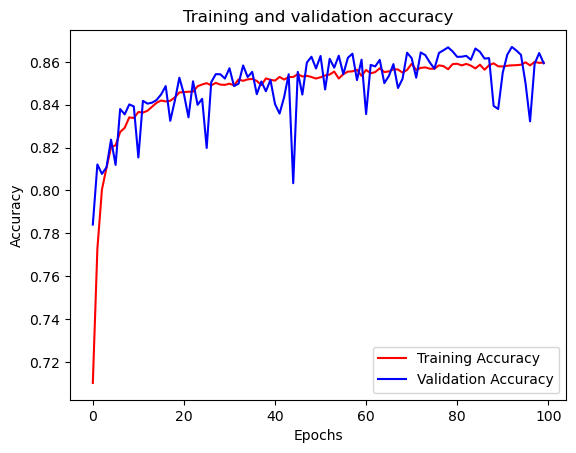

In [21]:
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs2, acc2, 'r', label = "Training Accuracy")
plt.plot(epochs2, val_acc2, 'b', label = "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy') 
plt.legend()  

plt.show()


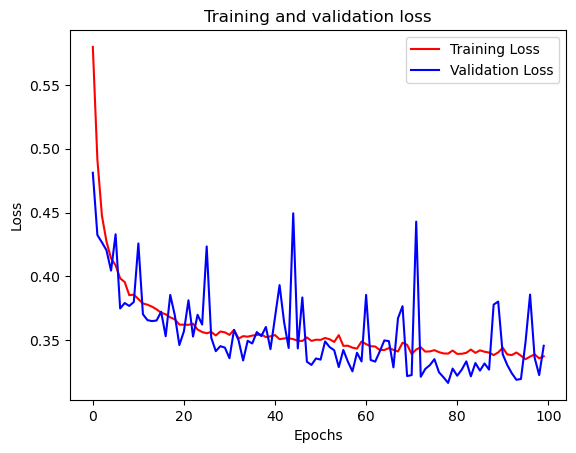

In [22]:
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs2, loss2, 'r', label = "Training Loss")
plt.plot(epochs2, val_loss2, 'b', label = "Validation Loss")
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()  

plt.show()
# Desired output. Charts with training and validation metrics. No crash :)

### Modelo 3

In [23]:
checkpoint3 = ModelCheckpoint('Pesos/Modelo3/pesos_del_modelo3_epoch_{epoch:02d}.h5', 
                             save_weights_only=True, 
                             save_best_only=False)

In [26]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (5, 5), activation='relu', input_shape=(50, 50, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    #tf.keras.layers.Conv2D(1024, (3, 3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model3.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
history3 = model3.fit(train_generator,
                              steps_per_epoch= 1000,
                              epochs=100,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks=checkpoint3)

Epoch 1/100
  41/1000 [>.............................] - ETA: 4:07 - loss: 0.7111 - accuracy: 0.5102

KeyboardInterrupt: 

In [17]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc3 = history3.history['accuracy']
val_acc3 = history3.history['val_accuracy']
loss3 =history3.history['loss']
val_loss3 =history3.history['val_loss']

epochs3=range(len(acc3)) # Get number of epochs


NameError: name 'history3' is not defined

In [13]:
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs3, acc3, 'r', label = "Training Accuracy")
plt.plot(epochs3, val_acc3, 'b', label = "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy') 
plt.legend()  

plt.show()


NameError: name 'epochs2' is not defined

In [ ]:
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs3, loss3, 'r', label = "Training Loss")
plt.plot(epochs3, val_loss3, 'b', label = "Validation Loss")
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()  

plt.show()
# Desired output. Charts with training and validation metrics. No crash :)

### Modelo 4

In [13]:
checkpoint4 = ModelCheckpoint('Pesos/Modelo4/pesos_del_modelo4_epoch_{epoch:02d}.h5', 
                             save_weights_only=True, 
                             save_best_only=False)

In [25]:
model4 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2, 2), activation='relu', input_shape=(50, 50, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model4.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
history4 = model4.fit(train_generator,
                              steps_per_epoch= 100,
                              epochs=100,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks=checkpoint4)

Epoch 1/100
100/100 [==============================] - 50s 499ms/step - loss: 0.4576 - accuracy: 0.7935 - val_loss: 0.4584 - val_accuracy: 0.7914
Epoch 2/100
100/100 [==============================] - 50s 500ms/step - loss: 0.4555 - accuracy: 0.7918 - val_loss: 0.4522 - val_accuracy: 0.7944
Epoch 3/100
100/100 [==============================] - 49s 495ms/step - loss: 0.4385 - accuracy: 0.8092 - val_loss: 0.4328 - val_accuracy: 0.8045
Epoch 4/100
100/100 [==============================] - 49s 497ms/step - loss: 0.4344 - accuracy: 0.8066 - val_loss: 0.4456 - val_accuracy: 0.8001
Epoch 5/100
100/100 [==============================] - 50s 499ms/step - loss: 0.4385 - accuracy: 0.8025 - val_loss: 0.5013 - val_accuracy: 0.7619
Epoch 6/100
100/100 [==============================] - 50s 498ms/step - loss: 0.4341 - accuracy: 0.8025 - val_loss: 0.4281 - val_accuracy: 0.8123
Epoch 7/100
100/100 [==============================] - 49s 496ms/step - loss: 0.4327 - accuracy: 0.8086 - val_loss: 0.4256 -

Epoch 57/100
100/100 [==============================] - 50s 500ms/step - loss: 0.3816 - accuracy: 0.8366 - val_loss: 0.4167 - val_accuracy: 0.8198
Epoch 58/100
100/100 [==============================] - 48s 488ms/step - loss: 0.3785 - accuracy: 0.8368 - val_loss: 0.3811 - val_accuracy: 0.8353
Epoch 59/100
100/100 [==============================] - 48s 487ms/step - loss: 0.3742 - accuracy: 0.8395 - val_loss: 0.3869 - val_accuracy: 0.8311
Epoch 60/100
100/100 [==============================] - 48s 483ms/step - loss: 0.3728 - accuracy: 0.8361 - val_loss: 0.3694 - val_accuracy: 0.8434
Epoch 61/100
100/100 [==============================] - 49s 489ms/step - loss: 0.3834 - accuracy: 0.8356 - val_loss: 0.3742 - val_accuracy: 0.8367
Epoch 62/100
100/100 [==============================] - 48s 485ms/step - loss: 0.3813 - accuracy: 0.8368 - val_loss: 0.4435 - val_accuracy: 0.8070
Epoch 63/100
100/100 [==============================] - 48s 484ms/step - loss: 0.3730 - accuracy: 0.8406 - val_loss: 0

In [31]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc4 = history4.history['accuracy']
val_acc4 = history4.history['val_accuracy']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

epochs4=range(len(acc4)) # Get number of epochs


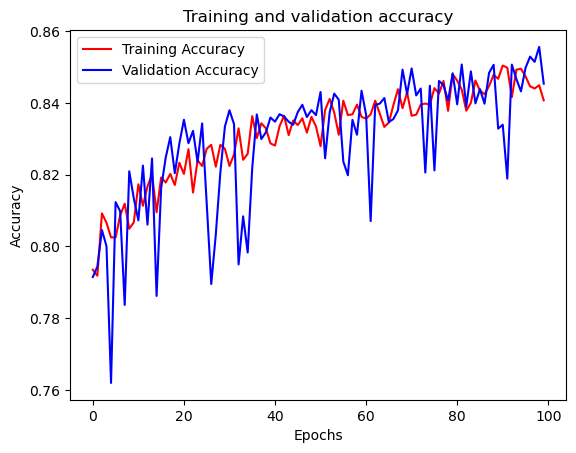

In [32]:
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs4, acc4, 'r', label = "Training Accuracy")
plt.plot(epochs4, val_acc4, 'b', label = "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy') 
plt.legend()  

plt.show()


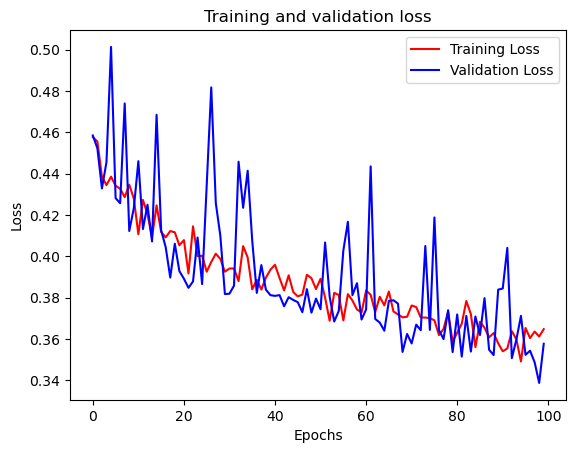

In [33]:
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs4, loss4, 'r', label = "Training Loss")
plt.plot(epochs4, val_loss4, 'b', label = "Validation Loss")
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()  

plt.show()
# Desired output. Charts with training and validation metrics. No crash :)

## Matriz de confusión 

NameError: name 'history' is not defined